The fft gain of 3 was too high here, so some of the data is probably truncated. See fft_gain_2 notebook.

In [10]:
%matplotlib inline
from scipy import signal
from kid_readout.measurement.io import npy
from kid_readout.roach import demodulator
from kid_readout.analysis.timeseries import binning

In [2]:
npd = npy.NumpyDirectory('/data/detectors/2016-12-07_163505_filterbank_bin_wideband/')

In [4]:
npd.node_names()

['StreamArray0',
 'ADCSnap1',
 'StreamArray2',
 'ADCSnap3',
 'StreamArray4',
 'ADCSnap5',
 'StreamArray6',
 'ADCSnap7',
 'StreamArray8',
 'ADCSnap9',
 'StreamArray10',
 'ADCSnap11',
 'StreamArray12',
 'ADCSnap13',
 'StreamArray14',
 'ADCSnap15',
 'StreamArray16',
 'ADCSnap17',
 'StreamArray18',
 'ADCSnap19',
 'StreamArray20',
 'ADCSnap21',
 'StreamArray22',
 'ADCSnap23',
 'StreamArray24',
 'ADCSnap25',
 'StreamArray26',
 'ADCSnap27',
 'StreamArray28',
 'ADCSnap29',
 'StreamArray30',
 'ADCSnap31',
 'StreamArray32',
 'ADCSnap33',
 'StreamArray34',
 'ADCSnap35',
 'StreamArray36',
 'ADCSnap37',
 'StreamArray38',
 'ADCSnap39',
 'StreamArray40',
 'ADCSnap41',
 'StreamArray42',
 'ADCSnap43',
 'StreamArray44',
 'ADCSnap45',
 'StreamArray46',
 'ADCSnap47',
 'StreamArray48',
 'ADCSnap49',
 'StreamArray50',
 'ADCSnap51',
 'StreamArray52',
 'ADCSnap53',
 'StreamArray54',
 'ADCSnap55',
 'StreamArray56',
 'ADCSnap57',
 'StreamArray58',
 'ADCSnap59',
 'StreamArray60',
 'ADCSnap61',
 'StreamArray62',


In [5]:
streams = [npd.read(name)[0] for name in npd.node_names() if name.startswith('StreamArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(1268.0, 1257.0),
 (1266.0, 1253.0),
 (1266.0, 1258.0),
 (1264.0, 1255.0),
 (1263.0, 1254.0),
 (1264.0, 1255.0),
 (1260.0, 1253.0),
 (1261.0, 1252.0),
 (1259.0, 1252.0),
 (1262.0, 1254.0),
 (1258.0, 1251.0),
 (1260.0, 1254.0),
 (1257.0, 1253.0),
 (1258.0, 1250.0),
 (1260.0, 1250.0),
 (1259.0, 1251.0),
 (1258.0, 1250.0),
 (1257.0, 1249.0),
 (1258.0, 1252.0),
 (1257.0, 1248.0),
 (1259.0, 1250.0),
 (1254.0, 1248.0),
 (1255.0, 1248.0),
 (1254.0, 1247.0),
 (1254.0, 1246.0),
 (1254.0, 1244.0),
 (1252.0, 1245.0),
 (1252.0, 1245.0),
 (1253.0, 1246.0),
 (1251.0, 1244.0),
 (1251.0, 1244.0),
 (1254.0, 1246.0),
 (1252.0, 1244.0),
 (1248.0, 1242.0),
 (1248.0, 1241.0),
 (1248.0, 1242.0),
 (1250.0, 1242.0),
 (1246.0, 1240.0),
 (1249.0, 1242.0),
 (1247.0, 1238.0),
 (1246.0, 1240.0),
 (1252.0, 1239.0),
 (1245.0, 1238.0),
 (1247.0, 1240.0),
 (1246.0, 1240.0),
 (1244.0, 1240.0),
 (1244.0, 1241.0),
 (1247.0, 1239.0),
 (1243.0, 1238.0),
 (1244.0, 1236.0),
 (1244.0, 1234.0),
 (1243.0, 1236.0),
 (1242.0, 12

In [7]:
streams[0].roach_state

StateDict({u'boffile': u'iq2xpfb11mcr11_2016_Jun_30_1215.bof', u'modulation_output': 0, u'modulation_rate': 0, u'fft_shift_register': 1048568, u'num_tone_samples': 16384, u'bank': 0, u'num_filterbank_channels': 2048, u'loopback': False, u'lo_frequency': 3000000000.0, u'adc_sample_rate': 512000000.0, u'waveform_normalization': 6.103515625e-05, u'hardware_delay_samples': 0.0, u'num_tones': 1, u'debug_register': 0, u'reference_sequence_number': -1, u'dac_attenuation': 0.0, u'heterodyne': True})

In [8]:
streams[0].sample_time.max()

0.016379999999999999

In [9]:
np.log2(streams[0].s21_raw.size)

12.0

In [11]:
nfft = 2**11
num_taps = 8
window = signal.hamming
hardware_delay_samples=streams[0].roach_state.hardware_delay_samples

demod = demodulator.Demodulator(nfft=nfft, num_taps=num_taps, window=window,
                                hardware_delay_samples=hardware_delay_samples)

def demodulate_data(sss):
    return demod.demodulate(data=sss.s21_raw,
                            tone_bin=sss.tone_bin,
                            tone_num_samples=sss.roach_state.num_tone_samples,
                            tone_phase=sss.tone_phase,
                            fft_bin=sss.filterbank_bin,
                            nchan=None,
                            seq_nos=None)

In [12]:
f_filterbank = streams[0].roach_state.adc_sample_rate / streams[0].roach_state.num_filterbank_channels
f_filterbank

250000.0

In [13]:
f_nyquist = f_filterbank / 2
f_nyquist

125000.0

In [14]:
n_filterbank = streams[0].filterbank_bin
n_filterbank

400

In [15]:
1e-6 * f_filterbank * n_filterbank

100.0

(-32768, 32768)

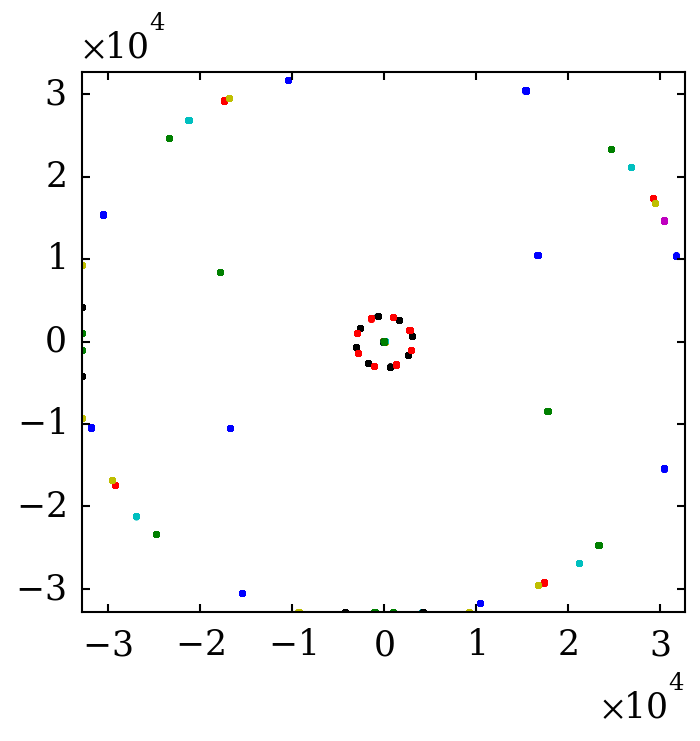

In [16]:
fig, ax = plt.subplots(figsize=(3, 3))
for stream in streams:
    ax.plot(stream.s21_raw.real, stream.s21_raw.imag, '.')
ax.set_xlim(-2**15, 2**15)
ax.set_ylim(-2**15, 2**15)
#ax.legend(loc='best', fontsize=3)

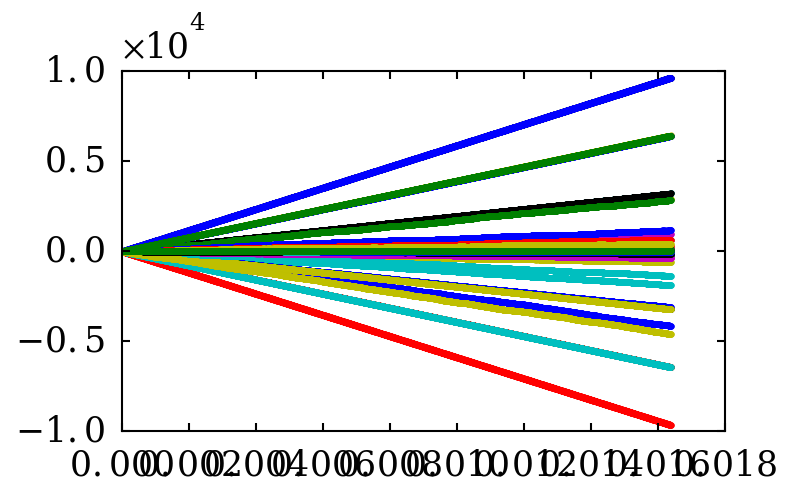

In [17]:
fig, ax = plt.subplots()
for stream in streams:
    ax.plot(stream.sample_time, np.unwrap(np.angle(stream.s21_raw)), '.')

# Center channel

In [18]:
center_index = len(streams) // 2
center = streams[center_index]
center.frequency

3100000000.0

In [19]:
np.log2(center.s21_raw.size)

12.0

In [20]:
s, f = plt.mlab.psd(center.s21_raw, Fs=center.stream_sample_rate, NFFT=center.s21_raw.size, noverlap=0, 
                    window=plt.mlab.window_none, sides='onesided')
edges, fb, sb = binning.log_bin_everywhere(f[1:-1], 10, s[1:-1])

(1e-05, 0.1)

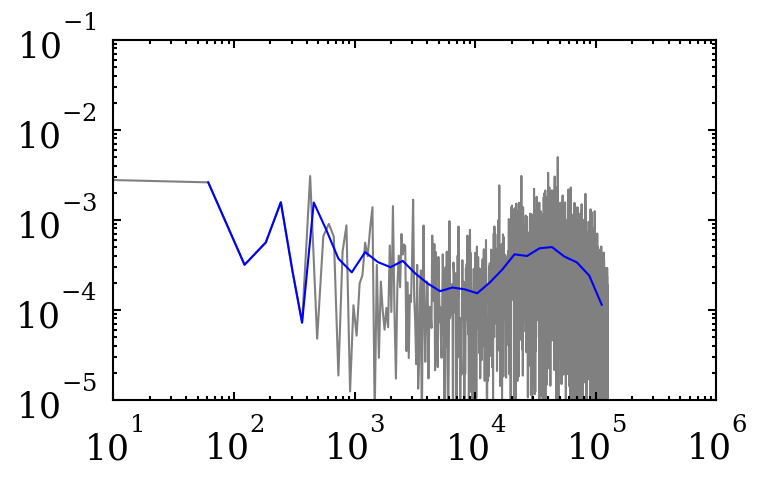

In [21]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(f, s, '-', color='gray')
ax.plot(fb, sb[0], '-', color='blue')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

# Demodulated data

In [22]:
s21_demod = demodulate_data(center)

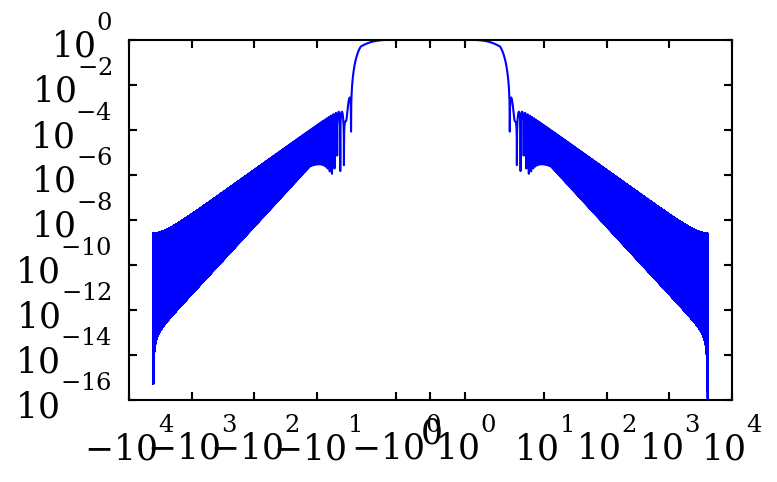

In [23]:
fig, ax = plt.subplots()
ax.set_xscale('symlog')
ax.set_yscale('log')
ax.plot(demod._window_frequency, demod._window_response)

In [24]:
sd, fd = plt.mlab.psd(s21_demod, Fs=center.stream_sample_rate, NFFT=s21_demod.size, noverlap=0,
                      window=plt.mlab.window_none, sides='onesided')
edges, fdb, sdb = binning.log_bin_everywhere(fd[1:-1], 10, sd[1:-1])

(1e-05, 0.1)

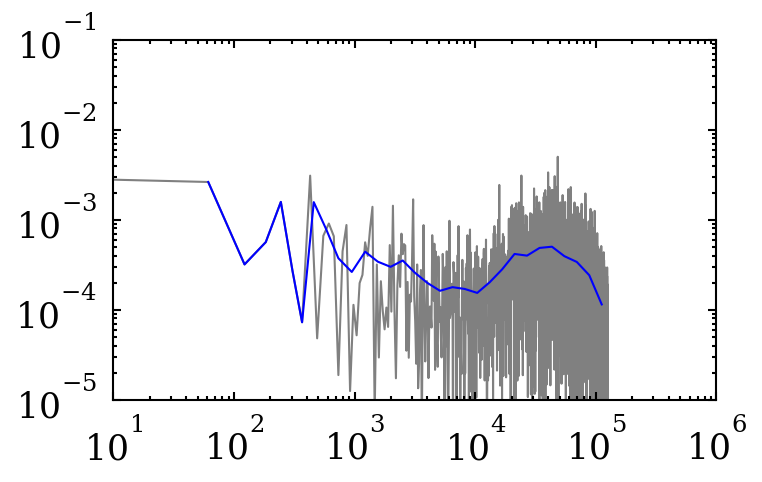

In [25]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(fd, sd, '-', color='gray')
ax.plot(fdb, sdb[0], '-', color='blue')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

(1e-05, 0.1)

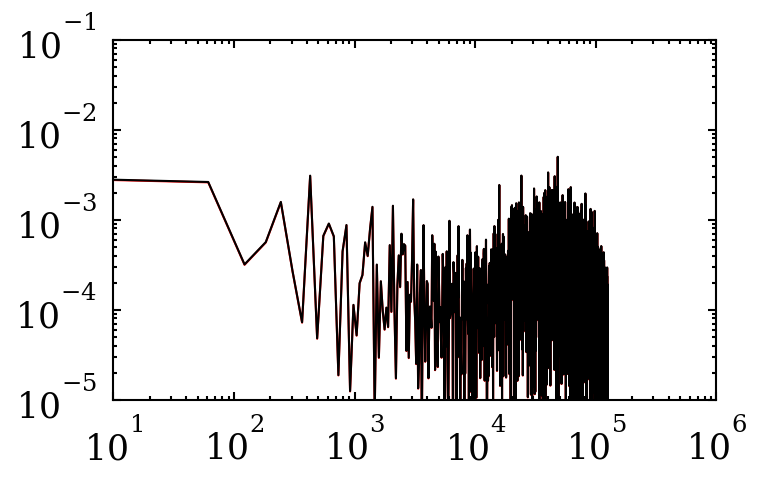

In [26]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(f, s, '-', color='red')
ax.plot(fd, sd, '-', color='black')
ax.plot()
ax.set_ylim(1e-5, 1e-1)

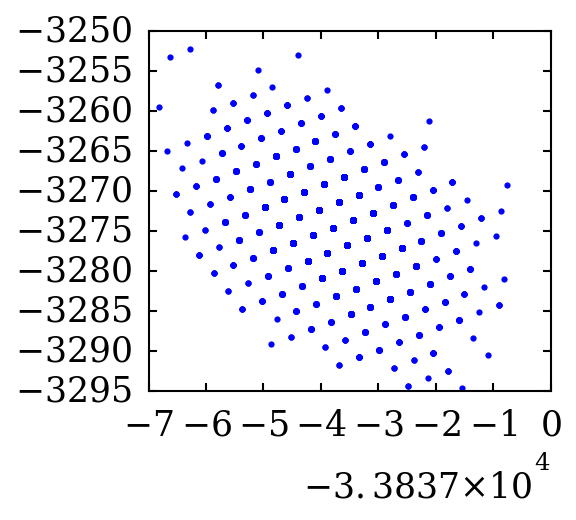

In [27]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(s21_demod.real, s21_demod.imag, '.b')

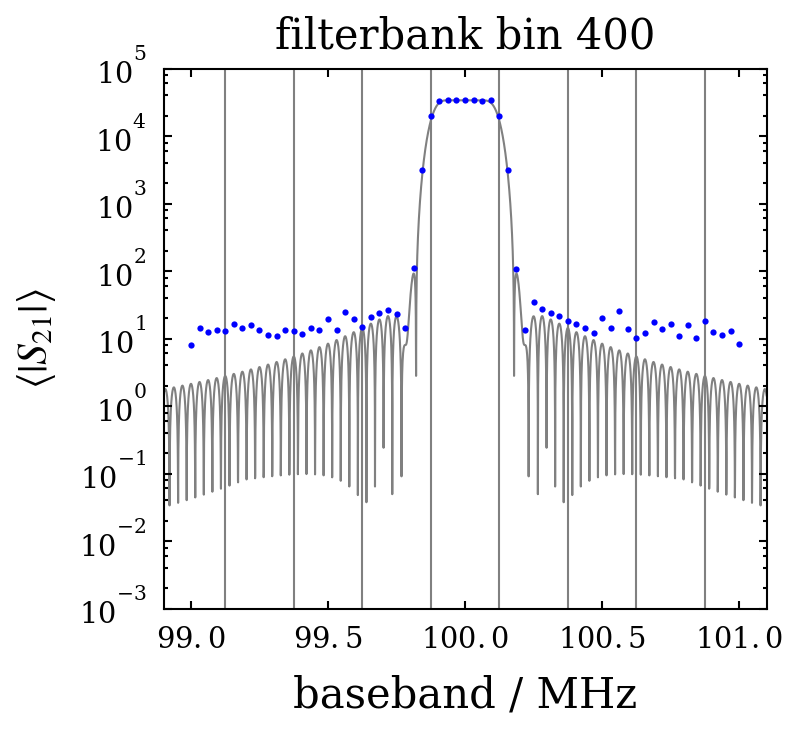

In [37]:
window_scale = 0.5
f_scale = 1e-6
f_center = 100e6
filterbank_bin_edges = f_filterbank * np.arange(n_filterbank - 4.5, n_filterbank + 5.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlabel('baseband / MHz')
ax.set_ylabel(r'$\langle |S_{21}| \rangle$')

ax.plot(f_scale * (f_center + window_scale * f_nyquist * demod._window_frequency),
        np.mean(np.abs(center.s21_raw)) * demod._window_response,
        '-', color='gray')
for edge in filterbank_bin_edges:
    ax.axvline(f_scale * edge, color='gray')
for stream in streams:
    ax.semilogy(f_scale * (stream.frequency - stream.roach_state.lo_frequency),
                np.mean(np.abs(stream.s21_raw)),
                '.b')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlim(98.9, 101.1)
#ax.set_xticks([99.9, 100, 100.1])
ax.set_ylim(1e-3, 1e5)
ax.tick_params(labelsize='xx-small')
ax.set_title('filterbank bin {:.0f}'.format(stream.filterbank_bin))

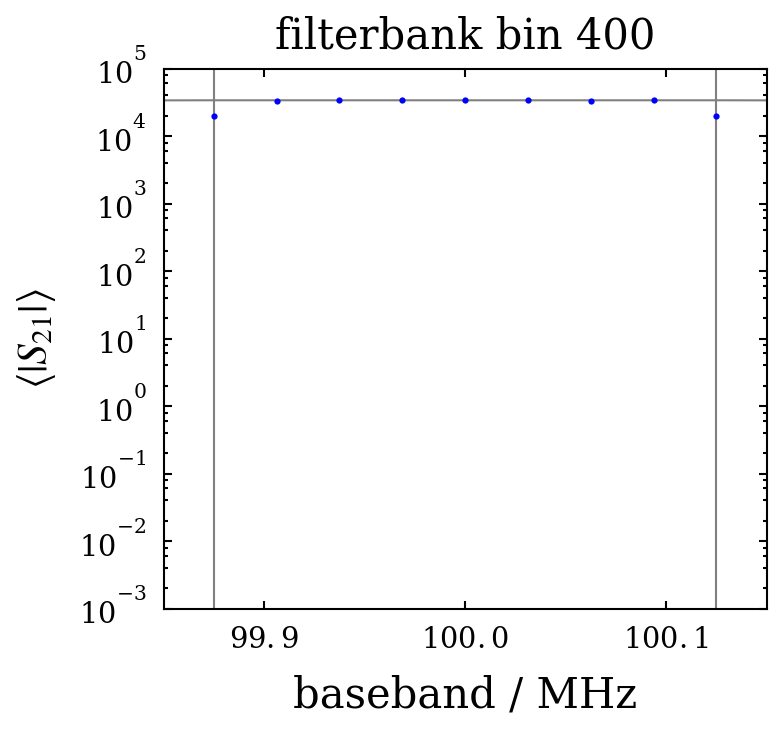

In [29]:
f_scale = 1e-6
f_center = 100e6
filterbank_bin_edges = f_filterbank * np.arange(n_filterbank - 4.5, n_filterbank + 5.5)

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlabel('baseband / MHz')
ax.set_ylabel(r'$\langle |S_{21}| \rangle$')

ax.plot(f_scale * (f_center + f_nyquist * demod._window_frequency),
        np.mean(np.abs(center.s21_raw)) * demod._window_response**(1/2),
        '-', color='gray')
for edge in filterbank_bin_edges:
    ax.axvline(f_scale * edge, color='gray')
for stream in streams:
    ax.semilogy(f_scale * (stream.frequency - stream.roach_state.lo_frequency),
                np.mean(np.abs(stream.s21_raw)),
                '.b')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.set_xlim(99.85, 100.15)
ax.set_xticks([99.9, 100, 100.1])
ax.set_ylim(1e-3, 1e5)
ax.tick_params(labelsize='xx-small')
ax.set_title('filterbank bin {:.0f}'.format(stream.filterbank_bin))